In [35]:
import tensorflow as tf
import numpy as np
from tensorflow import keras,image
from keras import activations,layers,initializers,losses,models,regularizers,Sequential,optimizers,utils
from tensorflow.keras.layers import Dropout,BatchNormalization,experimental
import matplotlib.pyplot as plt
from keras.datasets import mnist
import pandas as pd

In [36]:
tf.__version__

'2.9.1'

In [39]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [40]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [41]:
utils.np_utils.to_categorical(y_train,10)
utils.np_utils.to_categorical(y_test,10)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [42]:
y_train[0]

5

In [43]:
x_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [44]:
x_train=x_train/255.0
x_test=x_test/255.0

In [45]:
# assumed data of shape 2,4
def visualize_data(data):
    for i in range(4):
        plt.subplot(2,4,i+1)
        plt.imshow(data[i],cmap='gray')
    for i in range(4,8):
        plt.subplot(2,4,i+1)
        plt.imshow(data[i],cmap='gray')
    plt.show()

In [46]:
def augmentation_change(initial,final):
    plt.subplot(1,2,1)
    plt.title('Original Image')
    plt.imshow(initial,cmap='gray')
    plt.subplot(1,2,2)
    plt.title('Augmented Image')
    plt.imshow(final,cmap='gray')
    plt.show()

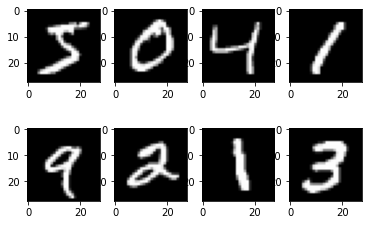

In [47]:
visualize_data(x_train[:8])

In [48]:
resize_rescale=Sequential([
    layers.Rescaling(scale=1./255),
    layers.Resizing(28,28)
])

In [52]:
mnist_model=Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(28,kernel_size=(3,3),kernel_regularizer=regularizers.L1(0.02),padding='valid',activation='relu',input_shape=(28,28)),
    BatchNormalization(),
    layers.Conv2D(28,kernel_size=(3,3),padding='valid',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(14,kernel_size=(3,3),padding='same',activation='relu',kernel_regularizer=regularizers.L2()),
    BatchNormalization(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10)
])
mnist_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 batch_normalization_8 (Batc  (None, 26, 26, 28)       112       
 hNormalization)                                                 
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 28)        7084      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 28)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 14)        3542      
                                                                 
 batch_normalization_9 (Batc  (None, 12, 12, 14)      

In [53]:
learning_rate=0.001
batch_size=32
epochs=4

In [54]:
mnist_model.compile(
    optimizer=optimizers.Adam(learning_rate=learning_rate),
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['Accuracy',losses.sparse_categorical_crossentropy]
)

In [55]:
history=mnist_model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.2,shuffle=True)

Epoch 1/4
1500/1500 [==============================] - 90s 59ms/step - loss: 0.3280 - Accuracy: 0.9566 - sparse_categorical_crossentropy: 1.3504 - val_loss: 0.3818 - val_Accuracy: 0.9061 - val_sparse_categorical_crossentropy: 1.3694
Epoch 2/4
1500/1500 [==============================] - 72s 48ms/step - loss: 0.1069 - Accuracy: 0.9794 - sparse_categorical_crossentropy: 1.2628 - val_loss: 0.0893 - val_Accuracy: 0.9830 - val_sparse_categorical_crossentropy: 1.2856
Epoch 3/4
1500/1500 [==============================] - 73s 49ms/step - loss: 0.0823 - Accuracy: 0.9831 - sparse_categorical_crossentropy: 1.2086 - val_loss: 0.2438 - val_Accuracy: 0.9444 - val_sparse_categorical_crossentropy: 1.2518
Epoch 4/4
1500/1500 [==============================] - 72s 48ms/step - loss: 0.0686 - Accuracy: 0.9860 - sparse_categorical_crossentropy: 1.1274 - val_loss: 0.0888 - val_Accuracy: 0.9813 - val_sparse_categorical_crossentropy: 1.2135


In [56]:
history.history

{'loss': [0.3280309736728668,
  0.10691927373409271,
  0.0822678878903389,
  0.06863491982221603],
 'Accuracy': [0.9566249847412109,
  0.9794374704360962,
  0.9831458330154419,
  0.9860208630561829],
 'sparse_categorical_crossentropy': [1.3504278659820557,
  1.2627793550491333,
  1.208553433418274,
  1.127360224723816],
 'val_loss': [0.38175255060195923,
  0.08926957100629807,
  0.2437654584646225,
  0.08879033476114273],
 'val_Accuracy': [0.906083345413208,
  0.9829999804496765,
  0.9444166421890259,
  0.981333315372467],
 'val_sparse_categorical_crossentropy': [1.3693509101867676,
  1.2855576276779175,
  1.251783013343811,
  1.2135182619094849]}

In [57]:
df=pd.DataFrame(history.history)
df

loss  Accuracy  sparse_categorical_crossentropy  val_loss  \
0  0.328031  0.956625                         1.350428  0.381753   
1  0.106919  0.979437                         1.262779  0.089270   
2  0.082268  0.983146                         1.208553  0.243765   
3  0.068635  0.986021                         1.127360  0.088790   

   val_Accuracy  val_sparse_categorical_crossentropy  
0      0.906083                             1.369351  
1      0.983000                             1.285558  
2      0.944417                             1.251783  
3      0.981333                             1.213518

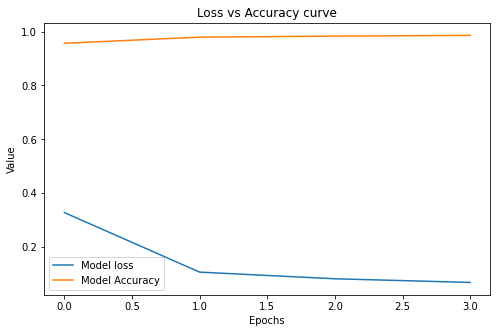

In [58]:
plt.figure(figsize=(8,5))
plt.plot(df['loss'],label='Model loss')
plt.plot(df['Accuracy'],label='Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Loss vs Accuracy curve')
plt.legend()
plt.show()

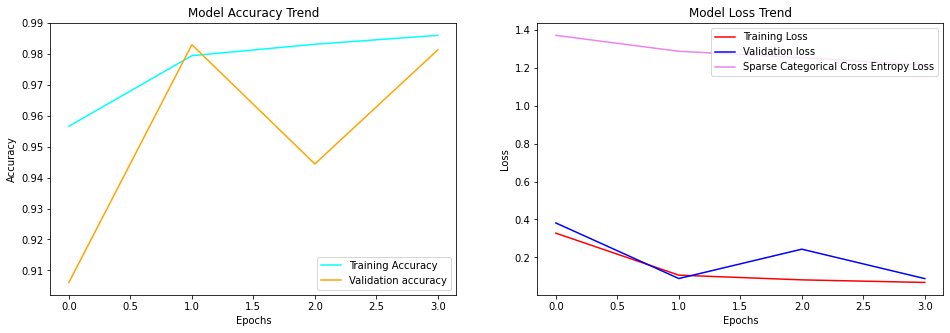

In [59]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(df['Accuracy'],label='Training Accuracy',color='cyan')
plt.plot(df['val_Accuracy'],label='Validation accuracy',color='Orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Trend')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(df['loss'],label='Training Loss',color='red')
plt.plot(df['val_loss'],label='Validation loss',color='Blue')
plt.plot(df['val_sparse_categorical_crossentropy'],label='Sparse Categorical Cross Entropy Loss',color='violet')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Model Loss Trend')
plt.show()

In [60]:
x=mnist_model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0829 - Accuracy: 0.9827 - sparse_categorical_crossentropy: 1.2082


In [61]:
print(f'Test Loss: {x[0]}')
print(f'Test Accuracy: {x[1]*100:.3f}%')
print(f'Sparse Categorical Cross Entropy Loss: {x[2]}')

Test Loss: 0.08293664455413818
Test Accuracy: 98.270%
Sparse Categorical Cross Entropy Loss: 1.2081574201583862


In [62]:
prediction_model=Sequential([
    mnist_model,
    layers.Softmax()
])

In [63]:
preds=prediction_model.predict(x_test)
preds.shape

313/313 [==============================] - 3s 9ms/step


(10000, 10)

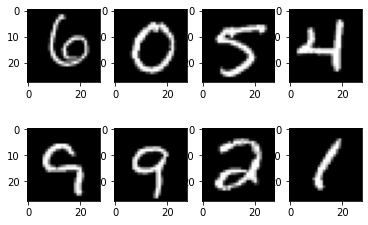

In [64]:
visualize_data(x_test[100:108])

In [89]:
# Sample Predictions
print("Prediction:",preds[100:108].argmax(axis=1))

Prediction: [6 0 5 4 9 9 2 1]


In [66]:
mnist_model.save('.\MNIST Model v1.0')

INFO:tensorflow:Assets written to: .\MNIST Model v1.0\assets


INFO:tensorflow:Assets written to: .\MNIST Model v1.0\assets


In [146]:
data_output=pd.DataFrame({
    'Actual':y_test,
    'Prediction':preds.argmax(axis=1)
})
data_output.set_index('Actual',inplace=True)
data_output

Prediction
Actual            
7                7
2                2
1                1
0                0
4                4
...            ...
2                2
3                3
4                4
5                5
6                6

[10000 rows x 1 columns]

In [147]:
data_output.to_csv('./Prediction Outputs.csv')